In [1]:
#Milk Quality Prediction


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv("Desktop\milknew.csv")
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [4]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
data.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 62.1+ KB


In [7]:
data.shape

(1059, 8)

In [8]:
data.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [9]:
data.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [10]:
data.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [11]:
data["Grade"].unique()

array(['high', 'low', 'medium'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder= LabelEncoder()

In [14]:
data["Grade_num"]=label_encoder.fit_transform(data["Grade"])

In [15]:
data.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
Grade_num       int32
dtype: object

In [16]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Grade_num
0,6.6,35,1,0,1,0,254,high,0
1,6.6,36,0,1,0,1,253,high,0
2,8.5,70,1,1,1,1,246,low,1
3,9.5,34,1,1,0,1,255,low,1
4,6.6,37,0,0,0,0,255,medium,2


In [17]:
df=data.drop(["Grade"],axis=1)

In [18]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade_num
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0


In [19]:
df.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade_num
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,-0.012518
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.094232
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,-0.197629
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,-0.454609
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,-0.501070
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.428017
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.212994
Grade_num,-0.012518,-0.094232,-0.197629,-0.454609,-0.501070,-0.428017,-0.212994,1.000000


In [20]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade_num
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,1.111426
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.763568
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,1.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


In [21]:
import scipy.stats as stats

In [22]:
stats.shapiro(df["pH"])

ShapiroResult(statistic=0.8345681428909302, pvalue=9.51733241220946e-32)

In [23]:
stats.shapiro(df["Temprature"])

ShapiroResult(statistic=0.7550786137580872, pvalue=6.3630030627563804e-37)

In [24]:
stats.shapiro(df["Taste"])

ShapiroResult(statistic=0.633407473564148, pvalue=1.1420582484247259e-42)

In [25]:
stats.shapiro(df["Odor"])

ShapiroResult(statistic=0.6299226880073547, pvalue=8.281673924159669e-43)

In [26]:
stats.shapiro(df["Turbidity"])

ShapiroResult(statistic=0.6364783048629761, pvalue=1.5204088337924265e-42)

In [27]:
stats.shapiro(df["Colour"])

ShapiroResult(statistic=0.7311363220214844, pvalue=3.2613587843150715e-38)

In [28]:
import seaborn as sns
from scipy import stats

In [29]:
num_col=df.select_dtypes(include=['float64','int64']).columns

In [30]:
num_col

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour'], dtype='object')

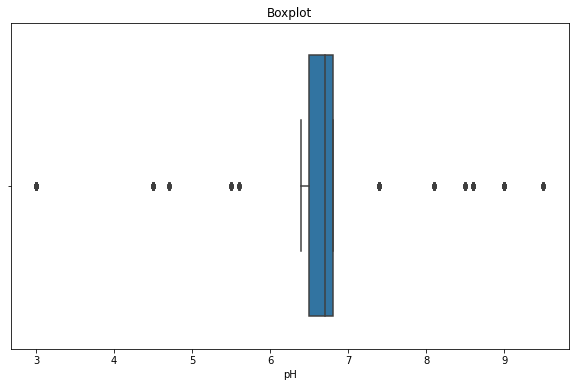

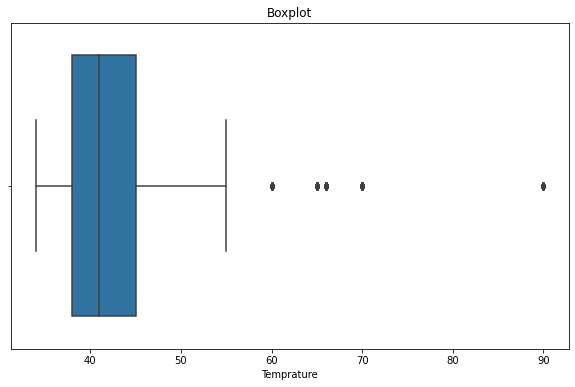

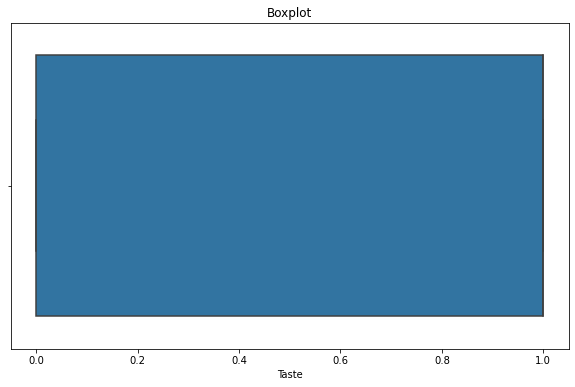

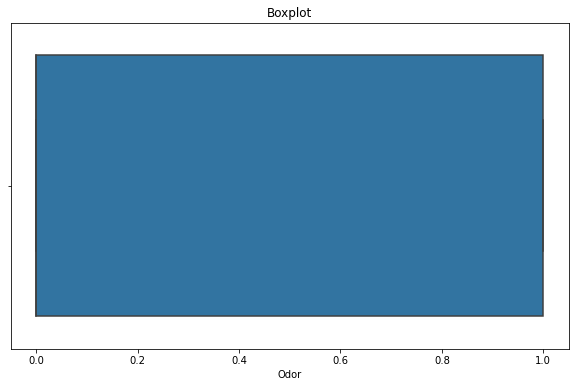

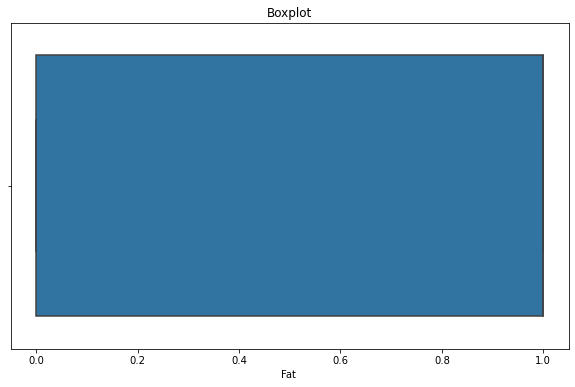

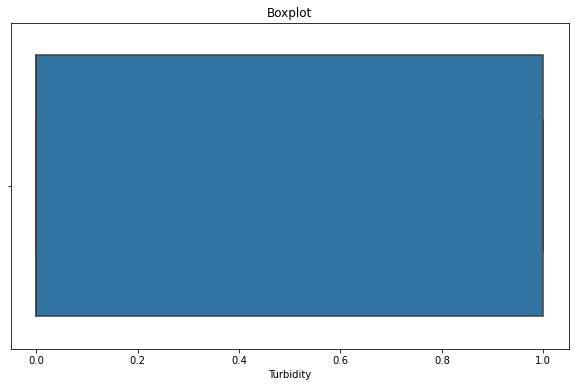

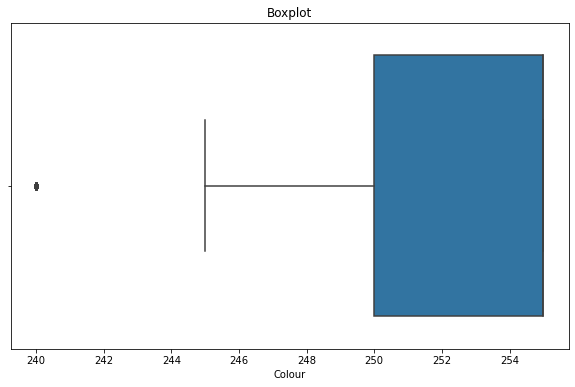

In [31]:
for col in num_col:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[col])
    plt.title("Boxplot")
    plt.show()
              

In [32]:
##Remove outliers from pH column using IQR

In [33]:
Q1=df["pH"].quantile(0.25)
Q1

6.5

In [34]:
Q3=df["pH"].quantile(0.75)
Q3

6.8

In [35]:
IQR=Q3-Q1

In [36]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [37]:
lower_bound


6.050000000000001

In [38]:
upper_bound

7.25

In [39]:
df_clean=data[(df["pH"]<lower_bound)| (df["pH"]>upper_bound)]

In [40]:
print(df_clean)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour Grade  Grade_num
2     8.5          70      1     1     1          1     246   low          1
3     9.5          34      1     1     0          1     255   low          1
6     5.5          45      1     0     1          1     250   low          1
7     4.5          60      0     1     1          1     250   low          1
8     8.1          66      1     0     1          1     255   low          1
...   ...         ...    ...   ...   ...        ...     ...   ...        ...
1048  9.5          34      1     1     0          1     255   low          1
1051  5.5          45      1     0     1          1     250   low          1
1053  8.1          66      1     0     1          1     255   low          1
1056  3.0          40      1     1     1          1     255   low          1
1058  8.6          55      0     1     1          1     255   low          1

[379 rows x 9 columns]


In [41]:
df_clean = df[df['pH'] != 100]


In [42]:
print(df_clean)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade_num
0     6.6          35      1     0     1          0     254          0
1     6.6          36      0     1     0          1     253          0
2     8.5          70      1     1     1          1     246          1
3     9.5          34      1     1     0          1     255          1
4     6.6          37      0     0     0          0     255          2
...   ...         ...    ...   ...   ...        ...     ...        ...
1054  6.7          45      1     1     0          0     247          2
1055  6.7          38      1     0     1          0     255          0
1056  3.0          40      1     1     1          1     255          1
1057  6.8          43      1     0     1          0     250          0
1058  8.6          55      0     1     1          1     255          1

[1059 rows x 8 columns]


In [43]:
## Remove outliers from Temprature using Z-score

In [44]:
df_clean['Z_Score'] = (df_clean['Temprature'] - df_clean['Temprature'].mean()) / df_clean['Temprature'].std()



In [45]:
threshold = 3
df_clean1 = df_clean[np.abs(df_clean['Z_Score']) < threshold]


In [46]:
df_clean1 = df_clean1.drop(columns=['Z_Score'])
print(df_clean1)


       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade_num
0     6.6          35      1     0     1          0     254          0
1     6.6          36      0     1     0          1     253          0
2     8.5          70      1     1     1          1     246          1
3     9.5          34      1     1     0          1     255          1
4     6.6          37      0     0     0          0     255          2
...   ...         ...    ...   ...   ...        ...     ...        ...
1054  6.7          45      1     1     0          0     247          2
1055  6.7          38      1     0     1          0     255          0
1056  3.0          40      1     1     1          1     255          1
1057  6.8          43      1     0     1          0     250          0
1058  8.6          55      0     1     1          1     255          1

[1042 rows x 8 columns]


In [47]:
df_clean1

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade_num
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0


In [48]:
df1=df_clean1

In [49]:
df1

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade_num
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0


In [50]:
df1.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade_num'],
      dtype='object')

In [51]:

df1.columns = df1.columns.str.strip()

df1.rename(columns={'Fat ': 'Fat', 'Temprature': 'Temperature'}, inplace=True)



In [52]:
try:
    X = df1[['Fat', 'Temperature']]
except KeyError as e:
    print("Error: ", e)
    print("Available columns are:", df1.columns)

In [53]:
df1["Fat"]

0       1
1       0
2       1
3       0
4       0
       ..
1054    0
1055    1
1056    1
1057    1
1058    1
Name: Fat, Length: 1042, dtype: int64

In [54]:
df1["Temperature"]

0       35
1       36
2       70
3       34
4       37
        ..
1054    45
1055    38
1056    40
1057    43
1058    55
Name: Temperature, Length: 1042, dtype: int64

In [55]:
from sklearn import preprocessing as P

In [56]:
stand=P.StandardScaler()

In [57]:
stand.fit(df1)

StandardScaler()

In [58]:
df1

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade_num
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0


In [59]:
df1

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade_num
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0


In [60]:
correlation=df.corr()
correlation

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade_num
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,-0.012518
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.094232
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,-0.197629
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,-0.454609
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,-0.501070
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.428017
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.212994
Grade_num,-0.012518,-0.094232,-0.197629,-0.454609,-0.501070,-0.428017,-0.212994,1.000000


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [83]:

X = df1[['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']]
y = df1['Grade_num']  

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [85]:
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\prati\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
y_pred_lr = model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
#report_lr = classification_report(y_test, y_pred_lr)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
r2_rf = r2_score(y_test, y_pred_lr)
mse_pls = mean_squared_error(y_test, y_pred_lr)
print(f'Logistic Regression Mean Squared Error: {mse_rf}')

print('Logistic Regression R^2 Score:')
print(r2_lr)

Logistic Regression Accuracy: 0.6741214057507987
Logistic Regression Mean Squared Error: 0.003194888178913738
Logistic Regression R^2 Score:
0.09101309490284437


In [87]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_rf = model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [74]:
print(f'Random Forest Regression Mean Squared Error: {mse_rf}')
print(f'Random Forest Regression R^2 Score: {r2_rf}')

Random Forest Regression Mean Squared Error: 0.003194888178913738
Random Forest Regression R^2 Score: 0.9944909884539567


In [75]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

df1['Cluster'] = clusters
print(df1.head())

    pH  Temperature  Taste  Odor  Fat  Turbidity  Colour  Grade_num  Cluster
0  6.6           35      1     0    1          0     254          0        0
1  6.6           36      0     1    0          1     253          0        0
2  8.5           70      1     1    1          1     246          1        1
3  9.5           34      1     1    0          1     255          1        0
4  6.6           37      0     0    0          0     255          2        0


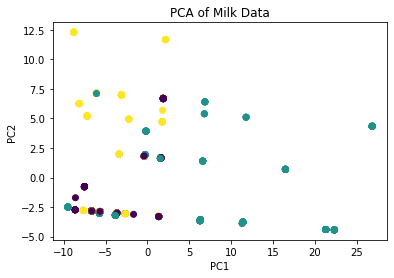

In [76]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Milk Data')
plt.show()

In [77]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize PLS model
pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)

# Predict and evaluate
y_pred_pls = pls.predict(X_test)
mse_pls = mean_squared_error(y_test, y_pred_pls)
r2_pls = r2_score(y_test, y_pred_pls)

print(f'PLS Regression Mean Squared Error: {mse_pls}')
print(f'PLS Regression R^2 Score: {r2_pls}')

PLS Regression Mean Squared Error: 0.32602621382484503
PLS Regression R^2 Score: 0.4378262788262771


In [78]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Initialize PCA and Linear Regression
pca = PCA(n_components=2)
lr = LinearRegression()

# Combine into a pipeline
model_pcr = Pipeline(steps=[('pca', pca), ('regression', lr)])
model_pcr.fit(X_train, y_train)

# Predict and evaluate
y_pred_pcr = model_pcr.predict(X_test)
mse_pcr = mean_squared_error(y_test, y_pred_pcr)
r2_pcr = r2_score(y_test, y_pred_pcr)

print(f'PCR Mean Squared Error: {mse_pcr}')
print(f'PCR R^2 Score: {r2_pcr}')

PCR Mean Squared Error: 0.5482782134304348
PCR R^2 Score: 0.054592574423291684


In [79]:
from sklearn.svm import SVR

# Initialize SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict and evaluate
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR Mean Squared Error: {mse_svr}')
print(f'SVR R^2 Score: {r2_svr}')

SVR Mean Squared Error: 0.553569539240687
SVR R^2 Score: 0.04546863225375153


In [80]:
from sklearn.neural_network import MLPRegressor

# Initialize ANN model
ann = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
ann.fit(X_train, y_train)

# Predict and evaluate
y_pred_ann = ann.predict(X_test)
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f'ANN Mean Squared Error: {mse_ann}')
print(f'ANN R^2 Score: {r2_ann}')

ANN Mean Squared Error: 0.3583003550306826
ANN R^2 Score: 0.3821753118487585


In [81]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'KNN Mean Squared Error: {mse_knn}')
print(f'KNN R^2 Score: {r2_knn}')

KNN Mean Squared Error: 0.04000000000000001
KNN R^2 Score: 0.9310271754435371


In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print(f'Random Forest Regression Mean Squared Error: {mse_rf}')
print(f'Random Forest Regression R^2 Score: {r2_rf}')